In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd

In [2]:
def read_as_dataframe(filename):
    
    d = {'Gamma': [], 'State': [], 'Method': [], 'Time': [], 'Fidelity': []}
    df = pd.DataFrame(data=d)
    
    with h5py.File(filename, "r") as f:
        gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']
        for gamma in gammas:
            init_states = f['gamma_'+gamma].keys()
            for state in init_states:
                methods = f['gamma_'+gamma][state].keys()
                for method in methods:
                    
                    fidelity = f['gamma_'+gamma][state][method][()]
                    ser_len = len(fidelity)
                    gamma_column = [gamma] * ser_len
                    state_column = [state] * ser_len
                    method_column = [method[9:]] * ser_len
                    time_column = range(0, ser_len)
                    
                    d_ser = {'Gamma': gamma_column,
                             'State': state_column,
                             'Method': method_column,
                             'Time': time_column, 
                             'Fidelity': fidelity}
            
                    df_ser = pd.DataFrame(data = d_ser)   
                    df = pd.concat([df, df_ser])
    return df

In [3]:
directory = "C:/Users/Zakhar/Documents/GitHub/JPOP_SID/DATA/"

In [9]:

df = pd.DataFrame(data = {'Ops_num':[],'Gamma': [], 'State': [], 'Method': [], 'Time': [], 'Fidelity': []})

for ops_num in range(2,5):
    print(ops_num)
    
    file_name = "Kurt_POPSID_DODECA_ops"+str(ops_num)+"_fidelity_test_all_2022-Sep-27_at_08-47.h5"  
    df_op = read_as_dataframe(directory+file_name)
    df_op['Ops_num'] = ops_num
    
    df = pd.concat([df, df_op])

2
3
4


NameError: name 'describe' is not defined

In [11]:
df.describe()

,Ops_num,Time,Fidelity
count,4.030326e+06,4.030326e+06,4.030326e+06
mean,3.000000e+00,1.614529e+03,9.749617e-01
std,8.164967e-01,1.220648e+03,6.164921e-02
min,2.000000e+00,0.000000e+00,6.008660e-02
25%,2.000000e+00,5.830000e+02,9.870717e-01
50%,3.000000e+00,1.326000e+03,9.958014e-01
75%,4.000000e+00,2.442000e+03,9.985096e-01
max,4.000000e+00,5.000000e+03,1.000000e+00


In [12]:
df.head()

,Ops_num,Gamma,State,Method,Time,Fidelity
0,2.0,0.079477,State_B1,kraus,0.0,1.000000
1,2.0,0.079477,State_B1,kraus,1.0,0.677293
2,2.0,0.079477,State_B1,kraus,2.0,0.729894
3,2.0,0.079477,State_B1,kraus,3.0,0.727242
4,2.0,0.079477,State_B1,kraus,4.0,0.727381


In [28]:
ops_gamma_method_fid = df.groupby(["Ops_num", "Gamma", "Method"])["Fidelity"].mean()
ops_gamma_method_fid = pd.DataFrame(data=ops_gamma_method_fid)
ops_gamma_method_fid

Fidelity
Ops_num Gamma    Method          
2.0     0.079477 kraus   0.710936
                 pade    0.918715
                 simp    0.959013
        0.25133  kraus   0.995677
                 pade    0.994574
...                           ...
4.0     7.9477   pade    0.998036
                 simp    0.998037
        79.477   kraus   0.932364
                 pade    0.934086
                 simp    0.934148

[72 rows x 1 columns]

<AxesSubplot:xlabel='Gamma', ylabel='Fidelity'>

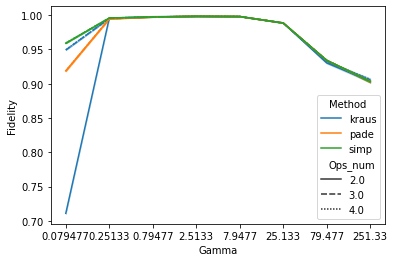

In [32]:
sns.lineplot(x="Gamma", y="Fidelity", hue="Method", style="Ops_num", data=df)

In [34]:
df_up = df[df['Gamma'].isin(['0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33'])]

<AxesSubplot:xlabel='Gamma', ylabel='Fidelity'>

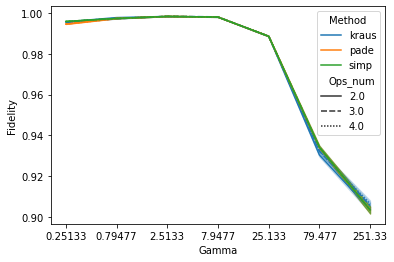

In [35]:
sns.lineplot(x="Gamma", y="Fidelity", hue="Method", style="Ops_num", data=df_up)

<AxesSubplot:xlabel='Time', ylabel='Fidelity'>

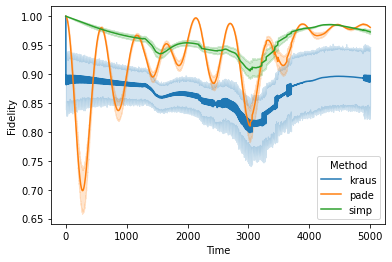

In [37]:
df_min_coup = df[df['Gamma'].isin(['0.079477'])]
sns.lineplot(x="Time", y="Fidelity", hue="Method", data=df_min_coup)

In [38]:
df_high_coup = df[df['Gamma'].isin(['79.477', '251.33'])]
df_small_coup = df[df['Gamma'].isin(['0.25133', '0.79477', '2.5133', '7.9477', '25.133'])] 

<AxesSubplot:xlabel='Gamma', ylabel='Fidelity'>

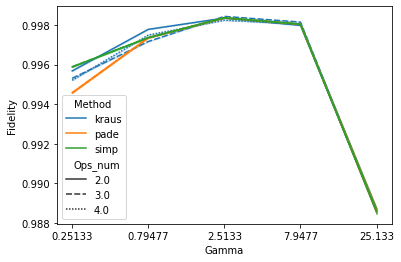

In [39]:
sns.lineplot(x="Gamma", y="Fidelity", hue="Method", style="Ops_num", data=df_small_coup)

<AxesSubplot:xlabel='Gamma', ylabel='Fidelity'>

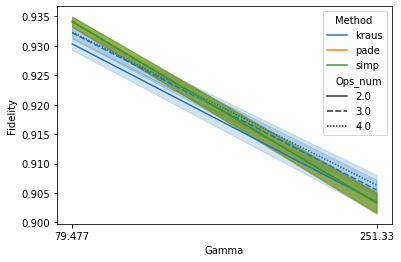

In [40]:
sns.lineplot(x="Gamma", y="Fidelity", hue="Method", style="Ops_num", data=df_high_coup)

<AxesSubplot:xlabel='Time', ylabel='Fidelity'>

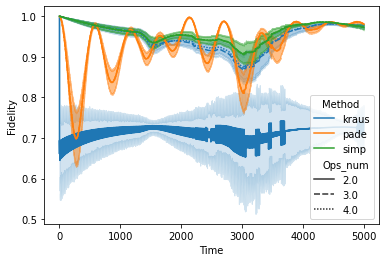

In [41]:
sns.lineplot(x="Time", y="Fidelity", hue="Method", data=df_min_coup, style="Ops_num")